## Collect Data form Haraj Used Dvices using web Scraping 

***This data content List of postes data with Date of post and Date of update.***
***You can using this Dataset to predict Recommendation for this month and for 
Time Series problems***

Kaggle link:www.kaggle.com/dataset/0c3095bce57844238daab70916c8baa38aad5cea68d7e646b1632e9d8d9623aa 

In [ ]:
#pip install selenium

In [1]:
import pandas as pd
import numpy as np
from random import randint
import seaborn as sns

import re #Regular expression
import requests
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import json
from datetime import datetime

## Scraping Data by from JavaScript using Json  

#### Scrape for one page

In [139]:
response_1 = requests.get('https://haraj.com.sa/tags/%D8%AD%D8%B1%D8%A7%D8%AC%20%D8%A7%D9%84%D8%A3%D8%AC%D9%87%D8%B2%D8%A9')
response_1.status_code

200

In [140]:
html = response_1.text
soup_1 = BeautifulSoup(response_1.text,'html.parser')
soup_1.title
script_1= soup_1.find_all('script')
script_1=script_1[2].contents[0].strip()[27:]
data=json.loads(script_1)
postes_items_1=data['PostsReducer']['dataStore']['{"tag":"حراج الأجهزة"}']['posts']['items']
df_1 = pd.DataFrame(postes_items_1)
df_1

,id,status,authorUsername,title,city,postDate,updateDate,hasImage,thumbURL,bodyHTML,tags,imagesList,commentStatus,commentCount,upRank,downRank
0,69955334,True,abduiuziz2013,رسيفر بي ان كورة,المدينة,1612049686,1612049686,False,,رسيفر للبيع \nجديد سبب البيع عدم الحاجه له \nع...,"[اجهزة غير مصنفة, حراج الأجهزة]",[],0,0,0,0
1,69955333,True,مريم الموسى7,رسامة ارسم من تحب,الرياض,1612049676,1612049676,True,900x897_6b2885fb-5fc7-41c3-9a1e-c33aaf81fa1a.jpg,رسامة \nارسم صورة شخصية لك او لمن تحب لاي مناس...,"[حراج الأجهزة, هواوي Huawei]",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,15,0
2,69955332,True,yassar07 fj,مكيف شباكي,جيزان,1612049676,1612049676,True,900x675_b8c76203-eb94-464b-a3ab-aebd64da769a.jpg,مكيف شباكي 24 وحده الزامل السوم 500<!-- images...,"[اجهزة غير مصنفة, حراج الأجهزة]",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,0,0
3,69955323,True,بندر عوده 1819,مكينة قهوة,جده,1612049632,1612049632,True,780x1040-1_-VgA4J4J1JiGqgg.jpg,\nمكينة قهوة لتحضير جميع انواع القهوه حار وبار...,"[اجهزة غير مصنفة, حراج الأجهزة, كل الحراج]",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,0,0
4,69955320,True,rm201994,جهاز (الخيط المائي) waterpik,مكه,1612049624,1612049624,True,900x894_283ee65a-358e-41fa-91c8-660c299a4c55.jpg,جهاز الخيط المائي ، البديل للخيط ايضاً فوايد...,"[اجهزة غير مصنفة, حراج الأجهزة, كل الحراج]",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,0,0
5,69955318,True,asamasam,حساب تيك توك للبيع,الطايف,1612049624,1612049624,True,663x900_38f7ed23-1bf8-48c3-a2d5-527eade9937e.jpg,حساب تيك توك للبيع يوزر رباعي وكل تفاصيل الحسا...,"[اجهزة غير مصنفة, حراج الأجهزة]",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,0,0
6,69955315,True,3non555,حاضنة منزلية,القصيم,1612049600,1612049600,False,,''حاضنة منزلية''🏡\nلكل موظفه،أو عندها زواج،أوم...,"[ابل Apple, ايفون iPhone, حراج الأجهزة]",[],0,0,0,0
7,69955313,True,sarah_342,ايفون11,أبها,1612049591,1612049591,True,632x900_69c0dff7-c6e1-4aaf-a9c4-7ae4a7741eec.jpg,ايفون11 برو ماكس زيتي مطفي 256 قيقا الاستخدام...,"[ابل Apple, ايفون iPhone, حراج الأجهزة]",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,0,0
8,69955312,True,fajrpe,ايباد Air2 للبيع شبه جديد,الرياض,1612049576,1612049576,True,800x1493-1_-GO__MTYxMjA0OTE4OTQ0Njk1MjQ5NTU4NQ...,ايباد Air2\nاستخدام نظيف \nالسعر 2000 ريال لان...,"[ابل Apple, ايباد iPad, حراج الأجهزة]",[https://img4cdn.haraj.com.sa/userfiles30/2021...,0,0,0,0
9,69955311,True,waied 572,كاميرات مراقبة مع تركيب,جده,1612049574,1612049574,True,240x320-1_-w6YKrzs17RuZvF.jpg,\nتركيب 4 كاميرت مع تمديد وبرمجه 5 ميجبكسل مع ...,"[اجهزة غير مصنفة, حراج الأجهزة]",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,0,0


#### Scrape for multiple page

In [131]:
url = ['https://haraj.com.sa/tags/%D8%AD%D8%B1%D8%A7%D8%AC%20%D8%A7%D9%84%D8%A3%D8%AC%D9%87%D8%B2%D8%A9',
      'https://haraj.com.sa/tags/%D8%AD%D8%B1%D8%A7%D8%AC%20%D8%A7%D9%84%D8%A3%D8%AC%D9%87%D8%B2%D8%A9#more']

In [132]:
pages = np.arange(0, 60, 1)

data={}
script_1=[]
   
for u in range(len(url)):
    for i in pages:
        #url_page=u+str(i)
        #soups.append(url[i])
        response = requests.get(url[u])
        html = response.text
        sleep(randint(5,15))
        soup = BeautifulSoup(response.content,'html.parser')
        script= soup.find_all('script')
        script_1.append(script)
        script=script[2].contents[0].strip()[27:]
        data.update(json.loads(script))

In [136]:
postes_items=data['PostsReducer']['dataStore']['{"tag":"حراج الأجهزة"}']['posts']['items']

In [137]:
df = pd.DataFrame(postes_items)

In [138]:
used_devices_df.to_csv('UsedDevices-Haraj.csv')

## Clean Data

In [146]:
us= pd.read_csv("UsedDevices-Haraj20.csv")
us=pd.DataFrame(us)
us=us.drop(['Unnamed: 0'],axis=1)
df=pd.concat([used_devices_df,us])

In [148]:
df.head(5)

,id,status,authorUsername,title,city,postDate,updateDate,hasImage,thumbURL,bodyHTML,tags,imagesList,commentStatus,commentCount,upRank,downRank
0,69935409,True,ابو علي 923,ارقام سوا لللبيع,الرياض,1612020234,1612020234,True,900x900_11030931-8192-42be-8dde-b7b9238fa4cf.jpg,ارقام سوا للبيع \nجديده \nالنقل فوري لجميع منا...,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,14,0
1,69935337,True,alisuleiman6666,رقم للبيع مميزز 0598064,الرياض,1612020172,1612020172,False,,0598064444\n\n\n\nع سوم<!-- imagesList -->,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",[],0,0,0,0
2,69934766,True,emem,للبيع ارقام سوا مميزة,جده,1612019554,1612019554,True,900x900-1_-6015774b7ddae.jpeg,........ ارقام سوا مميزة \r\n. \r\nالنقل بجميع...,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",[https://mimg1cdn.haraj.com.sa/userfiles30/202...,1,0,52,0
3,69934730,True,قطفةعسل,رقمم مميز جدا ثنائي خماسي للبيع,جده,1612019513,1612019513,True,800x800-1_-GO__MTYxMTMxODMzNTY2NTY2MjE0ODU5Nw.jpg,لدي رقم خماسي مميز للتنازل 0533488888 على السو...,"[empty, أرقام مميزة, ارقام مميزة من الاتصالات ...",[https://img4cdn.haraj.com.sa/userfiles30/2021...,0,1,0,0
4,69934166,True,abufahd18,رقم stc مميز,الشرقيه,1612018892,1612018892,True,900x889_6f46e4b0-e59b-4d0f-953c-d3b1e02d6125.jpg,للبيع رقم stc مميز \n.\nسوا هايبرد ( استقبال ح...,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",[https://mimg6cdn.haraj.com.sa/userfiles30/202...,0,0,23,0


#### Convert Json standard Date formate into Normal Date formate

In [149]:
df[['postDate']]=df[['postDate']].astype(int)

In [150]:
postDate_list=[]
for i in df['postDate']:
    dd=i
    postDate_list.append(datetime.fromtimestamp(dd).strftime('%Y-%m-%d %I:%M:%S %p'))
df[['postDate']]=postDate_list

In [151]:
postDate_list_2=[]
for i in df['updateDate']:
    dd=i
    postDate_list_2.append(datetime.fromtimestamp(dd).strftime('%Y-%m-%d %I:%M:%S %p'))
df[['updateDate']]=postDate_list_2

In [152]:
df.dtypes

id                 int64
status              bool
authorUsername    object
title             object
city              object
postDate          object
updateDate        object
hasImage            bool
thumbURL          object
bodyHTML          object
tags              object
imagesList        object
commentStatus      int64
commentCount       int64
upRank             int64
downRank           int64
dtype: object

#### remove unwanted characters from poste descripion 

In [153]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".",":","/",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['bodyHTML'] = df['bodyHTML'].str.replace(char, ' ')

In [154]:
df['bodyHTML'] = df['bodyHTML'].str.split().str.join(" ")

#### Extract price from string paragraph descripion

In [155]:
df['start_price'] = df['bodyHTML'].str.extract('(\سعر\s.?\d*)')
#df['start_prices'] = df['bodyHTML'].str.extract('(\البيع\السعر\s.?\d*)')
#df['bodyHTML']

In [156]:
#df[['s','e']]=df.bodyHTML.str.split('imagesList',expand=True)
#df[['bodyHTML']]=df['s']
#df=df.drop(columns=['s','e'])
df=df.rename(columns={'bodyHTML':'description'})

In [ ]:
#tag
#df[['tags']]=df['tags'].str.extract('([a-zA-Z]+)',expand=False).str.strip()
#df[['tags']]=df['tags'].str.extract('([A-Za-z])')

In [157]:
#start_prices
df[['start_price']]=df['start_price'].str.extract('(\d+)')
df[['start_price']]=df['start_price'].replace(np.nan, 0).astype(int)

In [158]:
df[['thumbURL']]=df[['thumbURL']].astype(str)
df[['thumbURL']]=df['thumbURL'].replace('nan',' ')

In [160]:
#Dropping irrelevant columns
df = df.drop(['authorUsername', 'thumbURL','commentStatus','imagesList','status','description','hasImage'], axis=1)
df.head(5)

,id,title,city,postDate,updateDate,tags,commentCount,upRank,downRank,start_price
0,69935409,ارقام سوا لللبيع,الرياض,2021-01-30 06:23:54 PM,2021-01-30 06:23:54 PM,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",0,14,0,0
1,69935337,رقم للبيع مميزز 0598064,الرياض,2021-01-30 06:22:52 PM,2021-01-30 06:22:52 PM,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",0,0,0,0
2,69934766,للبيع ارقام سوا مميزة,جده,2021-01-30 06:12:34 PM,2021-01-30 06:12:34 PM,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",0,52,0,0
3,69934730,رقمم مميز جدا ثنائي خماسي للبيع,جده,2021-01-30 06:11:53 PM,2021-01-30 06:11:53 PM,"[empty, أرقام مميزة, ارقام مميزة من الاتصالات ...",1,0,0,0
4,69934166,رقم stc مميز,الشرقيه,2021-01-30 06:01:32 PM,2021-01-30 06:01:32 PM,"[أرقام مميزة, ارقام مميزة من الاتصالات السعودي...",0,23,0,400


<AxesSubplot:>

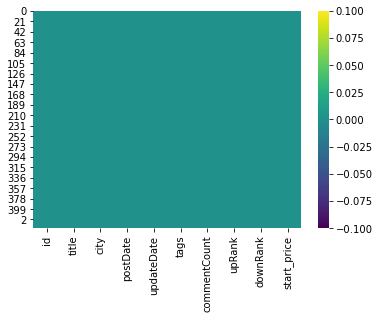

In [161]:
sns.heatmap(df.isnull(), cmap='viridis')

#### Convert Data Types

In [163]:
df[['title']]=df['title'].astype(str)
df[['city']]=df['city'].astype(str)
df[['tags']]=df['tags'].astype(str)
df[['postDate']]=pd.to_datetime(df.postDate)
df[['updateDate']]=pd.to_datetime(df.updateDate)

In [164]:
df.dtypes

id                       int64
title                   object
city                    object
postDate        datetime64[ns]
updateDate      datetime64[ns]
tags                    object
commentCount             int64
upRank                   int64
downRank                 int64
start_price              int32
dtype: object

In [165]:
df.to_csv('UsedDevices-Haraj-k.csv')